# 10 lebels

Label Description
0     Tshirt
1     Trouser
2     Pullover
3     Dress
4     Coat
5     Sandal
6     Shirt
7     Sneaker
8     Bag
9     Ankle boot

In [1]:
from keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


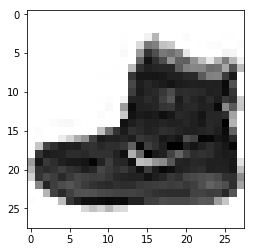

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap='gray_r')

In [3]:
y_train[0]

9

In [4]:
x_train.max()

255

In [5]:
#preprocessing data
#normalize xtrain and xtest by deviding max value of image
x_train=x_train/255
x_test=x_test/255

In [6]:
#reshape x to a 4 dim of single channel
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
# as the data is categorical so onehot
from keras.utils import to_categorical

y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [8]:
#build model
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [9]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax')) #cause 10 o/p

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train,y_cat_train, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0700 - acc: 0.9726
Epoch 2/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0494 - acc: 0.9807
Epoch 3/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0429 - acc: 0.9834
Epoch 4/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0387 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0355 - acc: 0.9862


In [12]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 303us/step


[0.04865466873496771, 0.9815400058746337]

In [13]:
model.metrics_names

['loss', 'acc']

In [14]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.97      0.98      0.98      1000
           2       0.80      0.90      0.84      1000
           3       0.93      0.88      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.68      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

